### PCA and LDA on Fischer Faces Dataset

Performed PCA on to reduce the dimension form 10201 to K using PCA for high dimensional data and then performed LDA on it to one dimension.

Libraries Used:
1. Numpy - for numerical computations such as eig(), matmul(), dot product etc.
2. Pillow - to read the .gif file
3. Matplotlib - to plot the graph

In [266]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

### Function get_data()

Input:
    folder name - either train or test
   
Output:
    the image data of dimension 101 X 101 is returned as numpy array X of shape (Number of image in folder, dimension of image)
    
   Labels - Happy(1) or Sad(2) - of the corresponding images
   

In [267]:
def get_data(folder):
    labels = [[], []]    

    for dirname, _, filenames in os.walk("Data/emotion_classification/"+ folder):
        i = 0
        for filename in filenames:   
            if "happy" in filename:
                labels[0].append(i)
            else:
                labels[1].append(i)
            i+=1

            gif = Image.open(os.path.join(dirname, filename))

            data = np.asarray(gif)

            x = data.reshape(1,101*101)

            if i == 1:
                X = x
            else:
                X = np.vstack((X, x))

    print("Input Data Shape", X.shape)
    print("Input Data", X)
    return X, labels

In [268]:
X, labels = get_data('train')

Input Data Shape (20, 10201)
Input Data [[ 23  20  17 ... 121 215 255]
 [ 25  34  46 ... 163 227 255]
 [133 142 146 ...  95  95  95]
 ...
 [ 40  54  67 ...  34  32  32]
 [100 103 108 ... 109 117 103]
 [ 17  24  31 ...  61  59  54]]


### function calculate_mean()

Input:

    x - any numpy array

Output:

    mean of the input dat calculated along the column

In [269]:
def calculate_mean(X):
    mean = np.sum(X, axis=0)
    mean = mean / len(X)
    print("mean of input", mean.shape, mean)
    return mean

In [270]:
mean = calculate_mean(X).reshape(10201, 1)

mean of input (10201,) [ 59.65  66.    70.85 ... 101.25 110.15 118.55]


### Calculating the mean centered data

#### $ X_c = X - \mu $

In [271]:
X_centered = X - mean.T
print("mean centered input data: ", X_centered.shape, X_centered)

mean centered input data:  (20, 10201) [[-36.65 -46.   -53.85 ...  19.75 104.85 136.45]
 [-34.65 -32.   -24.85 ...  61.75 116.85 136.45]
 [ 73.35  76.    75.15 ...  -6.25 -15.15 -23.55]
 ...
 [-19.65 -12.    -3.85 ... -67.25 -78.15 -86.55]
 [ 40.35  37.    37.15 ...   7.75   6.85 -15.55]
 [-42.65 -42.   -39.85 ... -40.25 -51.15 -64.55]]


## Class PCA
### function fit()

Input:
    X - input data points
performs:
####    Eigen Analysis on $\frac{1}{N}xx^T$ => Eigen Vectors $\{v_1, v_2, ..., v_d\}$ and Eigen Values$\{\lambda_1, \lambda_2, ..., \lambda_d\}$
Sort the eigen vector based on the magnitude of eigen values in non-increasing order

#### Compute the original Eigen Vector $u_i = \frac{1}{\sqrt(\lambda_iN)}x^Tv_i$

Stores the original eigen vectors in it's class attributes

### Function transform()

#### Input
X - Input data points to project 

#### Computes projected data points $y_i = U^Tx_n$

### Function fit_transform()

Performs fit and transform on the same input data points


In [272]:
class PCA:
    def __init__(self, num_components):
        self.num_components = num_components
        self.principal_components = None
        
    def fit(self, X):
        N = len(X)
        data = np.matmul(X, X.T) / len(X)
        
        eigenValues, eigenVectors = np.linalg.eigh(data)
        
        idx = eigenValues.argsort()[::-1]   
        eigenValues = eigenValues[idx]
        eigenVectors = eigenVectors[:,idx]
        
        for i in range(self.num_components):
            u = (X.T.dot(eigenVectors.T[i])) / ((N*eigenValues[i])**(1/2))
            
            if i == 0:
                U = u
            else:
                U = np.vstack((U, u))
        print("Original Eigen vector", U.shape, U)
        
        self.principal_components = U
        return U
    
    def transform(self, X):
        U = self.principal_components
        P = U.dot(X.T)
        print("Projected Data", P.T.shape, P.T)
        return P
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
        

In [273]:
K = 17

pca = PCA(K)
U = pca.fit(X_centered)

Original Eigen vector (17, 10201) [[ 0.00115826  0.00150926  0.00197879 ... -0.0008064  -0.00046737
  -0.0034823 ]
 [-0.01789599 -0.01738252 -0.01712507 ... -0.01894991 -0.01928142
  -0.02171333]
 [ 0.00217229  0.00105655  0.0005249  ...  0.03429417  0.04331959
   0.04319925]
 ...
 [-0.0068297  -0.00706774 -0.00711378 ... -0.01074867  0.00415079
  -0.003098  ]
 [-0.01300381 -0.01017989 -0.00831078 ...  0.02271688  0.01227954
   0.01389118]
 [-0.00746346 -0.00434221 -0.00113804 ... -0.00517495 -0.01904807
  -0.00527319]]


In [274]:
P= pca.transform(X_centered)

Projected Data (20, 17) [[-1.19308200e+03  1.18829989e+03  2.82929986e+03  6.85637317e+02
   5.55069124e+02  3.32762727e+02 -1.51454884e+02  9.13082749e+02
   3.26480452e+02  1.46029176e+02 -2.38737669e+02  4.66057480e+02
  -6.23194260e+02 -5.45722188e+02  5.37830887e+02 -4.59653009e+02
  -6.65332601e+02]
 [ 3.24018556e+03 -9.95571304e+02  3.69112829e+02  4.57189235e+02
   7.90584663e+01 -1.36421608e+02 -1.54980039e+02  7.05972065e+02
  -1.10751447e+03 -1.21294669e+03  8.43996328e+02 -2.73655841e+02
  -8.81573771e+02  2.81502162e+02  2.43645217e+02  1.08519156e+02
   2.97682722e+02]
 [ 5.20109637e+03 -1.51431966e+03 -6.23638011e+01  1.51882640e+03
   1.66374430e+02  1.33737649e+03  1.07596592e+03 -4.04672484e+02
   8.13433020e+02  8.02790515e+02  7.52176834e+01  1.03121413e+02
   1.21980106e+01 -1.16132971e+02 -1.28897232e+02  7.96318550e+01
   3.30602230e+00]
 [-1.06680773e+03  1.02703207e+03  3.09012052e+03  3.51169661e+02
   1.04229928e+03  8.11043690e+02 -1.87773380e+02  7.74137848

### Function get_labels()

Return the label vector with each entry corresponding to the label of each image in data point

In [275]:
def get_labels(labels):
    y = []
    
    N = sum([len(i) for i in labels])
    for i in range(N):
        if i in labels[0]:
            y.append(1)
        else:
            y.append(2)

    print("Labels", y)
    return y

## Class LDA
### Function fit()

Inputs:

X-Input data point, y-Corresponding labels

## Calculates
### Mean for each class
### $ m_i = \frac{1}{N_1} \sum_{n \in c_1} X_{n'}$

where i = 1, 2

### Within-class Scatter Matrix
### $S_W = \frac{1}{N_1} \sum_{n \in c_1}(x_n - m_1)(x_n - m_1)^T + \frac{1}{N_2} \sum_{n \in c_2}$

### Between-class Scatter Matrix
#### $ S_B = (m_2 - m_1)(m_2 - m_1)^T$

### Performs Eigen analysis on $S_W^{-1}S_B$ => Eigen Vectors, Eigen Values

Sort the Eigen Vectors based on the magnitude of the corresponding Eigen Value in non-increasing order

### Linear Discriminant w = Eigen Vector corresponding to the largest Eigen Value

Stores the Linear Discriminant in it's class attribute

### Function transform()

Computes the project data points on the Linear Discriminant

#### $ y_n = w^Tx_n $

### Function fit_transform()

Performs both fit and transform on the same data points

In [276]:
class LDA:

    def __init__(self, num_components):
        self.num_components = num_components
        self.linear_discriminant = None

    def fit(self, X, y):
        classes = np.unique(y)

        Sw = np.zeros((K, K))
        Sb = np.zeros((K, K))
        
        for i in classes:
            X_c = X[labels[i-1]]
            
            mean_c = calculate_mean(X_c).reshape(1, K)
            
            if i == 1:
                mean1 = mean_c
                Sw += (np.matmul((X_c - mean_c).T, (X_c - mean_c)) / len(labels[0]))
            else:
                mean2 = mean_c
                Sw += (np.matmul((X_c - mean_c).T, (X_c - mean_c)) / len(labels[1]))
        
        mean_difference = (mean2 - mean1).reshape(K,1)
        
        Sb +=  (mean_difference).dot(mean_difference.T)

        S = np.linalg.inv(Sw).dot(Sb)

        eigenValues, eigenVectors = np.linalg.eig(S)
        
        idx = eigenValues.argsort()[::-1]   
        eigenValues = eigenValues[idx]
        eigenVectors = eigenVectors[:,idx]
        
        eigenVectors = eigenVectors.real
        self.linear_discriminant = eigenVectors.T[0]

    def transform(self, X):
        return np.dot(self.linear_discriminant, X.T)
    
    def fit_transform(self, X, y):
        fit(X, y)
        return transform(X)

### Computes the Linear discriminat based on the projected data points from PCA

In [277]:
lda = LDA(1)

y = get_labels(labels)
lda.fit(P.T, y)

Labels [2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2]
mean of input (17,) [-197.35958317 -638.95258043  102.36206762  144.99668997  226.54976984
  300.8188473   -98.18956449 -376.28692888   83.43507757  -29.00773317
   12.15993823  218.53822016  206.82438227  -13.6397201    -1.26810471
   66.25425753   65.47233866]
mean of input (17,) [ 161.4760226   522.77938399  -83.7507826  -118.63365543 -185.35890259
 -246.12451143   80.3369164   307.87112363  -68.26506347   23.73359986
   -9.94904037 -178.80399831 -169.21994913   11.15977099    1.03754022
  -54.20802889  -53.56827709]


### project and plot the graph for the train data

### optimal threshold = 50

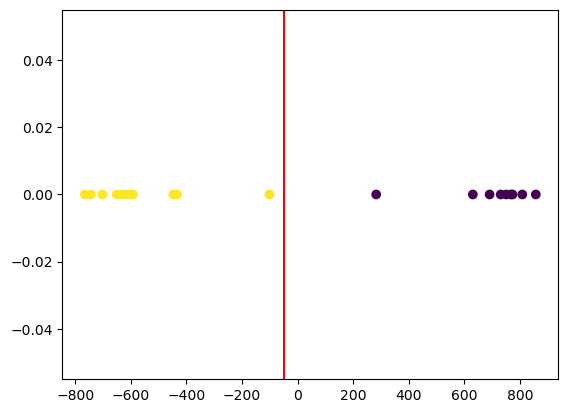

In [278]:
projected_data_train = lda.transform(P.T)

threshold = -50

N = [0 for i in range(20)]

plt.scatter(projected_data_train, N, c = y)
plt.axvline(x = threshold, color = 'r', linestyle = '-')
plt.show()

### Takes in the test image data as input

In [279]:
X_test, labels_test = get_data('test')
X_centered_test = X_test - mean.T
print(X_centered_test.shape)

Input Data Shape (10, 10201)
Input Data [[ 58  91 111 ...  43  50  57]
 [ 18  27  26 ...  65  64  62]
 [158 167 174 ... 118 117 118]
 ...
 [110 111 111 ...  74  73  78]
 [123 123 123 ...  65  78  96]
 [119 119 118 ...  59  65  78]]
(10, 10201)


### PCA projects the Test data to K-dimensional vector

In [280]:
P = pca.transform(X_centered_test)

Projected Data (10, 17) [[ 9.19511647e+02  1.69600342e+02  9.55428039e+02  6.44675360e+02
   5.64542074e+02 -1.07681559e+03  7.49131426e+02 -6.23175572e+02
   7.47964903e+02 -1.88638607e+02  7.99336166e+02  2.50761615e+02
  -2.83181062e+02  1.85216036e+01 -2.54350619e+01  5.66580538e+02
  -3.20609774e+02]
 [ 7.36721582e+02  4.00076091e+02 -9.40936062e+02  2.41534591e+02
   7.08475580e+02 -1.12754656e+00 -3.08606636e+02  2.85292706e+02
   7.54031537e+02 -4.31487764e+02  7.08691433e+02  4.72648427e+02
   5.05319069e+02 -2.34102640e+02 -9.22473405e+01  2.34867298e+01
  -1.32503232e+02]
 [ 6.11646003e+03 -4.15348601e+02 -1.37984460e+03  1.50911418e+03
  -7.33012250e+02  7.58874543e+02  6.72982579e+02  1.20670495e+03
  -3.08113332e+02  9.66503189e+01  3.85659617e+02 -2.12342668e+01
   8.35006003e+01 -2.09663103e+01 -1.45486402e+02 -3.77000199e+02
  -2.15944859e+02]
 [ 1.50241585e+01  2.00552840e+03  6.22822764e+02  1.40770780e+03
  -7.71205503e+02  1.04418717e+03  5.67838739e+02  1.03281638

### The K-dimensional data points from PCA are projected onto a 1-Dimensional vector using LDA

In [281]:
projected_data = lda.transform(P.T)

### Projected data points are plotted
classification accuracy = 100%

Labels [1, 1, 2, 2, 1, 2, 1, 1, 2, 1]


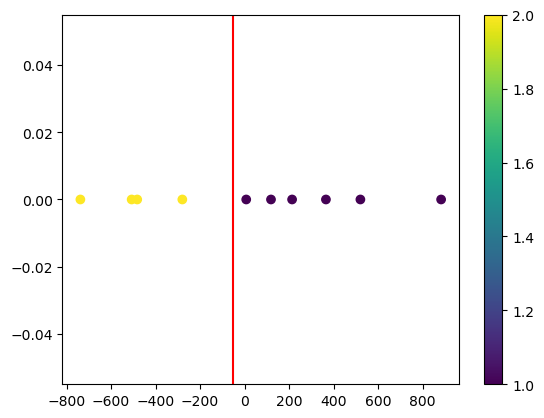

In [282]:
N = [0 for nn in range(10)]

y = get_labels(labels_test)

plt.scatter(projected_data, N, c = y)
plt.axvline(x = threshold, color = 'r', linestyle = '-')
plt.colorbar()
plt.show()

#### separability is computed on the projected data

#### separability for K = 17 is 1.1966

In [283]:
projected_data = projected_data.T

mean1 = calculate_mean(projected_data[labels_test[0]])
mean2 = calculate_mean(projected_data[labels_test[1]])

s1 = (projected_data[labels_test[0]] - mean1).T.dot((projected_data[labels_test[0]] - mean1)) 
s2 = (projected_data[labels_test[1]] - mean2).T.dot((projected_data[labels_test[1]] - mean2))

m = (mean2 - mean1)**2

print("Separability:", (m / (s1 + s2)).round(6))

mean of input () 351.6685126006857
mean of input () -501.8649315041541
Separability: 1.196676


### K value that gives maximum separability = 17
### Optimal threshold = -50
### classification Accuracy = 100%